## Instalación

Documentación:

https://mediapipe.dev/

In [ ]:
# Instalación
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.9 MB 23.2 MB/s 


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

import math
import numpy as np
import mediapipe as mp

In [ ]:
def resize_and_show(image):
    
    DESIRED_HEIGHT = 480
    DESIRED_WIDTH = 480

    h, w = image.shape[:2]
    if h < w:
        img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
    else:
        img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
    cv2_imshow(img)

In [ ]:
def show_image(uploaded):

    images = {name: cv2.imread(name) for name in uploaded.keys()}

    for name, image in images.items():
        # print(name)   
        resize_and_show(image)
    return images

## Malla facial

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving face.jfif to face.jfif


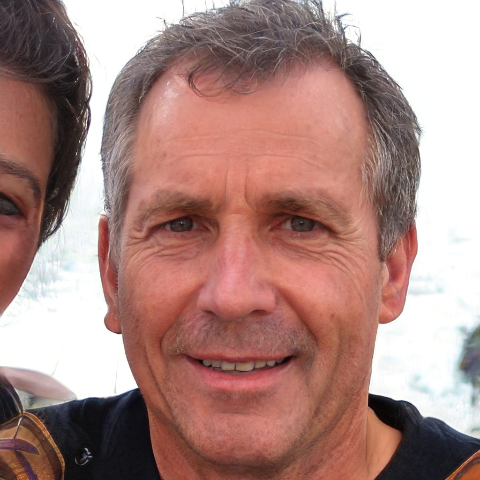

In [ ]:
images = show_image(uploaded)

In [ ]:
mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

#help(mp_face_mesh.FaceMesh)

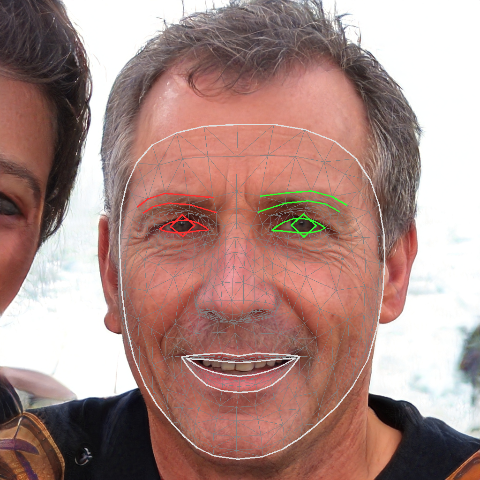

In [ ]:
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    refine_landmarks=True,
    max_num_faces=1,
    min_detection_confidence=0.5) as face_mesh:
  for name, image in images.items():
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # print(f'Face landmarks of {name}:')
    if not results.multi_face_landmarks:
      continue
    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_TESSELATION,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_tesselation_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_CONTOURS,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_contours_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_iris_connections_style())
    resize_and_show(annotated_image)

## Puntos de referencia de la mano

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hand.jfif to hand.jfif


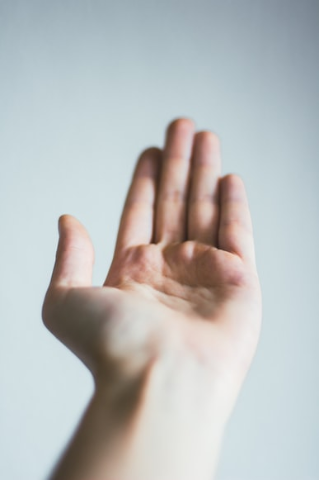

In [ ]:
images = show_image(uploaded)

In [ ]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

# help(mp_hands.Hands)

Handedness of hand.jfif:
[classification {
  index: 0
  score: 0.862377405166626
  label: "Left"
}
]
Hand landmarks of hand.jfif:
Index finger tip coordinate: ( 203.1866626739502, 190.46527448296547)


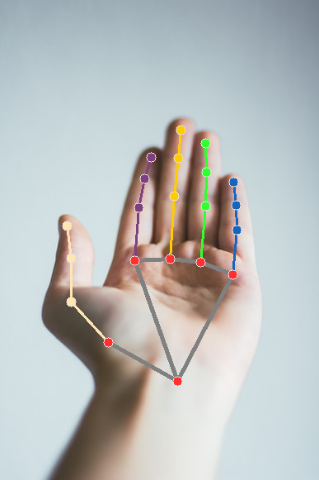

In [ ]:
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=1,
    min_detection_confidence=0.1) as hands:
  for name, image in images.items():
    results = hands.process(cv2.flip(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 1))

    print(f'Handedness of {name}:')
    print(results.multi_handedness)

    if not results.multi_hand_landmarks:
      continue
    print(f'Hand landmarks of {name}:')
    image_hight, image_width, _ = image.shape
    annotated_image = cv2.flip(image.copy(), 1)
    for hand_landmarks in results.multi_hand_landmarks:
      print(
          f'Index finger tip coordinate: (',
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_hight})'
      )
      mp_drawing.draw_landmarks(
          annotated_image,
          hand_landmarks,
          mp_hands.HAND_CONNECTIONS,
          mp_drawing_styles.get_default_hand_landmarks_style(),
          mp_drawing_styles.get_default_hand_connections_style())
    resize_and_show(cv2.flip(annotated_image, 1))

## Estimación de pose

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hinton.png to hinton.png


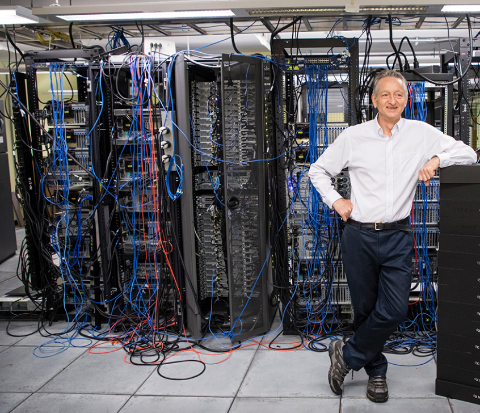

In [ ]:
images = show_image(uploaded)

In [ ]:
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

# help(mp_pose.Pose)

Nose coordinates: (698.4532871246338, 181.5198655128479)
Pose landmarks of hinton.png:


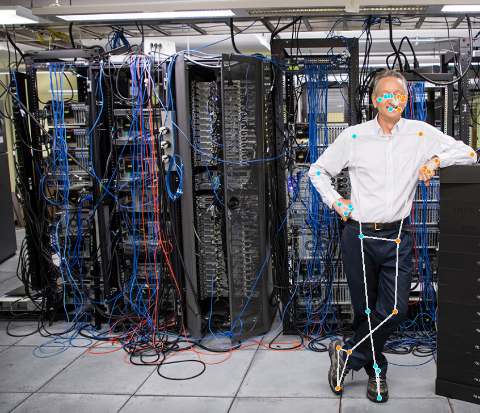

In [ ]:
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.3, model_complexity=2) as pose:
  for name, image in images.items():
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    image_hight, image_width, _ = image.shape
    if not results.pose_landmarks:
      continue
    print(
      f'Nose coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_hight})'
    )

    print(f'Pose landmarks of {name}:')
    annotated_image = image.copy()
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    resize_and_show(annotated_image)

## Detección de objetos 3D

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving shoe.jpg to shoe.jpg


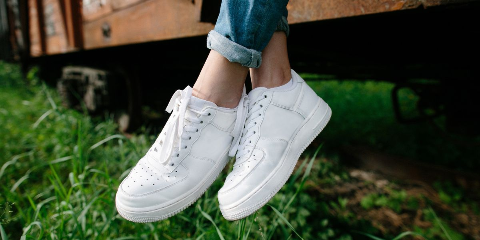

In [ ]:
shoe_images = show_image(uploaded)

In [ ]:
mp_objectron = mp.solutions.objectron
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

# help(mp_objectron.Objectron)

Box landmarks of shoe.jpg:


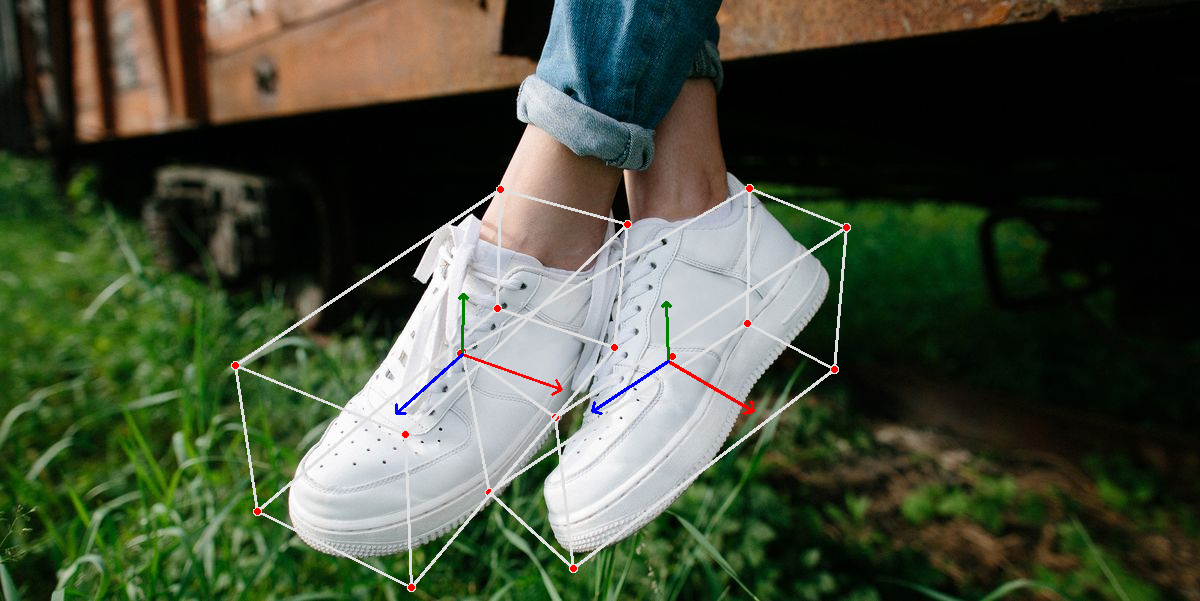

In [ ]:
with mp_objectron.Objectron(
    static_image_mode=True,
    max_num_objects=5,
    min_detection_confidence=0.5,
    model_name='Shoe') as objectron:
  for name, image in shoe_images.items():
    results = objectron.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if not results.detected_objects:
      print(f'No box landmarks detected on {name}')
      continue
    print(f'Box landmarks of {name}:')
    annotated_image = image.copy()
    for detected_object in results.detected_objects:
      mp_drawing.draw_landmarks(
          annotated_image, detected_object.landmarks_2d, mp_objectron.BOX_CONNECTIONS)
      mp_drawing.draw_axis(annotated_image, detected_object.rotation, detected_object.translation)
    cv2_imshow(annotated_image)